<h4> Add Libraries and importing diabeties datasets

In [78]:
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


<h4> <p>Add libraries for data analysis 

loading dataset

In [79]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
diabeties = load_diabetes()
type(diabeties)

sklearn.utils.Bunch

<h4> Learn about the diabeties dataset

The features are scaled by standard diviation method

1. Target: Measure of disease 1 year after baseline

2. features: 
    1.  Age
    2.  Sex
    3.  BMI
    4.  BP
    5.  Total Serum Cholesterol
    6.  Low Density Lipo-Protiens
    7.  High Density Lipo-Protiens
    8.  Total cholesterol
    9.  log(Serum Triglyceroids)
    10. Blood Sugar 

In [80]:
print(diabeties.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<h4> The Feature names are different as below

In [81]:
diabeties.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

<h4> 
creating DataFrame
Adding columns names to the dataframe

In [82]:
df=pd.DataFrame(diabeties.data)
df.columns=diabeties.feature_names
df['target'] = diabeties['target']
df.rename(columns = {'s1' : 'Tot_Serum_Cholesterol', 's2' : 'Low_Density_LipoProteins', 's3':'High_Density_LipoProteins',\
    's4':'Tot_Cholesterol','s5':'Log_Serum_Triglyserides','s6':'Blood_Sugar_Level','age':'Age','sex':'Gender',\
        'bmi':'BMI','bp':'BP'}, inplace = True)

df.head()

,Age,Gender,BMI,BP,Tot_Serum_Cholesterol,Low_Density_LipoProteins,High_Density_LipoProteins,Tot_Cholesterol,Log_Serum_Triglyserides,Blood_Sugar_Level,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<h4> There are no null values

Size is 442 X 10

In [83]:
df.describe()

,Age,Gender,BMI,BP,Tot_Serum_Cholesterol,Low_Density_LipoProteins,High_Density_LipoProteins,Tot_Cholesterol,Log_Serum_Triglyserides,Blood_Sugar_Level,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        442 non-null    float64
 1   Gender                     442 non-null    float64
 2   BMI                        442 non-null    float64
 3   BP                         442 non-null    float64
 4   Tot_Serum_Cholesterol      442 non-null    float64
 5   Low_Density_LipoProteins   442 non-null    float64
 6   High_Density_LipoProteins  442 non-null    float64
 7   Tot_Cholesterol            442 non-null    float64
 8   Log_Serum_Triglyserides    442 non-null    float64
 9   Blood_Sugar_Level          442 non-null    float64
 10  target                     442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<h4>Standard Deviation is same for all the features except target column

In [85]:
df.describe()

,Age,Gender,BMI,BP,Tot_Serum_Cholesterol,Low_Density_LipoProteins,High_Density_LipoProteins,Tot_Cholesterol,Log_Serum_Triglyserides,Blood_Sugar_Level,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


<h4>
The dependent features are called the dependent variables, outputs, or responses.

The independent features are called the independent variables, inputs, or predictors.

In [44]:
df.shape

(442, 11)

In [90]:
(52.05*.038)-(174.55*0.050680) + (760.7*0.021)+150.86

159.966406

In [86]:
df[['Age']],df[['Target']]

,Age
0,0.038076
1,-0.001882
2,0.085299
3,-0.089063
4,0.005383
...,...
437,0.041708
438,-0.005515
439,0.041708
440,-0.045472


<h2><b> Applying Linear Regression to predict diesease progression after 1 year

In [45]:
regr_model=LinearRegression()

<b>Splitting Data for traning the model and testing the prediction


80% Training

20% Testing

In [46]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=.2,random_state=6)
df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape

((442, 11), (353, 10), (89, 10), (353, 1), (89, 1))

<b>Training the model

In [47]:
regr_model.fit(x_train, y_train)

LinearRegression()

<b> Predicting the targets

In [48]:
y_predict = regr_model.predict(x_test)

<b>Evaluation the Model with RMSE and R-Square values

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)
rmse,r2

(54.39899473425268, 0.458142855451689)

<b>Finding the slope and intercept of the line Y

In [50]:
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)

Slope: [[  -53.90396481  -275.28710446   544.60473637   364.55070495
  -1094.39312069   747.00278828   218.83381543   178.08111107
    857.80549012    81.872915  ]]
Intercept: [150.33741067]


<h1> <b>r2: should be close to 1


rmse: should be less

<b><h3> EDA: Feature Selection to fine tune the Model

<AxesSubplot:>

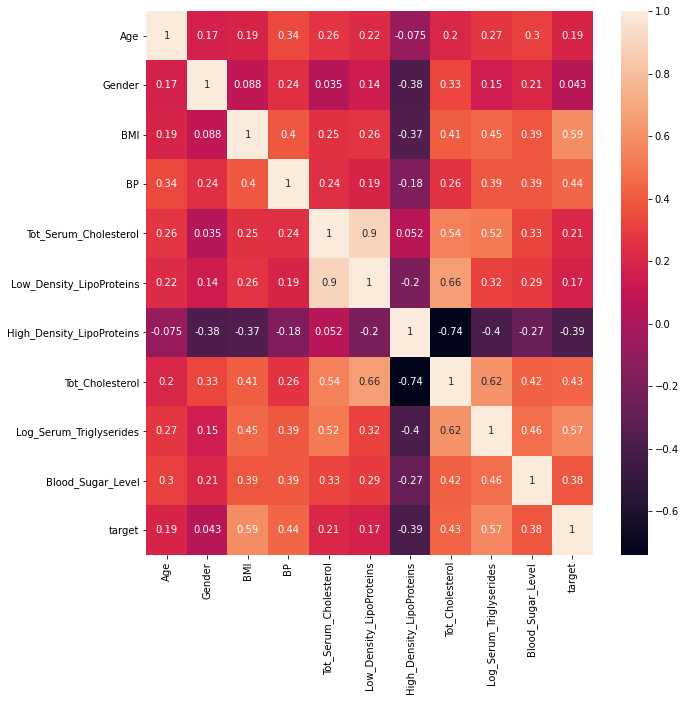

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


In [52]:
abs(df.corr()['target'][:]).sort_values(ascending=False)

target                       1.000000
BMI                          0.586450
Log_Serum_Triglyserides      0.565883
BP                           0.441484
Tot_Cholesterol              0.430453
High_Density_LipoProteins    0.394789
Blood_Sugar_Level            0.382483
Tot_Serum_Cholesterol        0.212022
Age                          0.187889
Low_Density_LipoProteins     0.174054
Gender                       0.043062
Name: target, dtype: float64

<b><h3>Selecting all the columns that has corr greater than 0.3 with traget column and evaluate the model

1. BMI                          0.586450
2. Log_Serum_Triglyserides      0.565883
3. BP                           0.441484
4. Tot_Cholesterol              0.430453
5. High_Density_LipoProteins    0.394789
6. Blood_Sugar_Level            0.382483

<b><h4>The Features should not be depended on each other. So dropping features which has inter denpendencies

In [53]:
for col in df.columns[:-1]:
    print(col,':')
    print(abs(df.corr()[col][:]).sort_values(ascending=False),end='\n\n')

Age :
Age                          1.000000
BP                           0.335427
Blood_Sugar_Level            0.301731
Log_Serum_Triglyserides      0.270777
Tot_Serum_Cholesterol        0.260061
Low_Density_LipoProteins     0.219243
Tot_Cholesterol              0.203841
target                       0.187889
BMI                          0.185085
Gender                       0.173737
High_Density_LipoProteins    0.075181
Name: Age, dtype: float64

Gender :
Gender                       1.000000
High_Density_LipoProteins    0.379090
Tot_Cholesterol              0.332115
BP                           0.241013
Blood_Sugar_Level            0.208133
Age                          0.173737
Log_Serum_Triglyserides      0.149918
Low_Density_LipoProteins     0.142637
BMI                          0.088161
target                       0.043062
Tot_Serum_Cholesterol        0.035277
Name: Gender, dtype: float64

BMI :
BMI                          1.000000
target                       0.586450
Log_Serum_

<h4><b>We can see 'Tot_Cholesterol' and 'Log_Serum_Triglyserides' has more corr for the featues of corr[taget]>.3

<h4><b>Applying Model on features that has corr >0.3

In [54]:
df1=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','Blood_Sugar_Level','target']]
x1_train,x1_test,y1_train,y1_test=train_test_split(df1.iloc[:,:-1].values,df1.iloc[:,-1:].values,test_size=.1,random_state=6)
df1.shape,x1_train.shape, x1_test.shape,y1_train.shape,y1_test.shape

((442, 7), (397, 6), (45, 6), (397, 1), (45, 1))

In [55]:
regr_model.fit(x1_train, y1_train)
y1_predict = regr_model.predict(x1_test)
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_predict))
r21= r2_score(y1_test, y1_predict)
print('old rmse and r2',rmse,r2)
print('rmse & r2',rmse1,r21)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)

old rmse and r2 54.39899473425268 0.458142855451689
rmse & r2 53.78422809284733 0.5890554510981845
Slope: [[ 517.95124927  537.50018747  295.06581268 -166.76558704 -280.86571673
    44.42022261]]
Intercept: [150.73046389]


<h4><b>The r2 value increased and rmse decreased. This is an improvement

The next fine tune by dropping corr < .4



In [56]:
df2=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol']]
x2_train,x2_test,y2_train,y2_test=train_test_split(df2.iloc[:,:-1].values,df2.iloc[:,-1:].values,test_size=.2,random_state=6)
df2.shape,x2_train.shape, x2_test.shape,y2_train.shape,y2_test.shape

((442, 4), (353, 3), (89, 3), (353, 1), (89, 1))

In [57]:
regr_model.fit(x2_train, y2_train)
y2_predict = regr_model.predict(x2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_predict))
r22 = r2_score(y2_test, y2_predict)
print('rmse & r2 for Coor >.03',rmse1,r21)
print('rmse & r2',rmse2,r22)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)

rmse & r2 for Coor >.03 53.78422809284733 0.5890554510981845
rmse & r2 0.03437310019785917 0.37713929087083964
Slope: [[ 0.1844516   0.56210467 -0.01236162]]
Intercept: [-0.00059427]


<h4><b>The RMSE significantly decreased but r2 also decreased which is not advisable.

So fine tuning by dropping inter dependent features

 'Tot_Cholesterol' and 'Log_Serum_Triglyserides' has more corr for the featues of corr[taget]>.3

In [58]:
df3=df[['BMI','BP','High_Density_LipoProteins','Blood_Sugar_Level','target']]
x3_train,x3_test,y3_train,y3_test=train_test_split(df3.iloc[:,:-1].values,df3.iloc[:,-1:].values,test_size=.2,random_state=6)
df3.shape,x3_train.shape, x3_test.shape,y3_train.shape,y3_test.shape

((442, 5), (353, 4), (89, 4), (353, 1), (89, 1))

In [59]:
regr_model.fit(x3_train, y3_train)
y3_predict = regr_model.predict(x3_test)
rmse3 = np.sqrt(mean_squared_error(y3_test, y3_predict))
r23 = r2_score(y3_test, y3_predict)
print('rmse & r2 for Corr >.03',rmse1,r21)
#print('rmse & r2 for corr',rmse2,r22)
print('rmse & r2',rmse3,r23)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)

rmse & r2 for Corr >.03 53.78422809284733 0.5890554510981845
rmse & r2 57.0378542438644 0.4042975123855762
Slope: [[ 664.99739312  373.27603487 -288.15350391  158.95082715]]
Intercept: [150.36113553]


<h4><b> The r2 value decreased and rmse increased. Not Advisable

fine tuning by removing Blood sugar

In [60]:
df4=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','target']]
x4_train,x4_test,y4_train,y4_test=train_test_split(df4.iloc[:,:-1].values,df4.iloc[:,-1:].values,test_size=.2,random_state=6)
df4.shape,x4_train.shape, x4_test.shape,y4_train.shape,y4_test.shape

((442, 6), (353, 5), (89, 5), (353, 1), (89, 1))

In [61]:
regr_model.fit(x4_train, y4_train)
y4_predict = regr_model.predict(x4_test)
rmse4 = np.sqrt(mean_squared_error(y4_test, y4_predict))
r24 = r2_score(y4_test, y4_predict)

print('rmse & r2 for Corr >.03',rmse1,r21)
print('rmse & r2',rmse4,r24)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)

rmse & r2 for Corr >.03 53.78422809284733 0.5890554510981845
rmse & r2 53.493905803243024 0.476023665014517
Slope: [[ 595.87055278  533.46021099  293.58720469 -142.63453007 -252.01298626]]
Intercept: [150.18580922]


<h4><b> NO change in rmse but r2 decresed not advisable

Fine Tuning by splitting 90% Train and 10%Test

In [62]:
df5=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','target']]
x5_train,x5_test,y5_train,y5_test=train_test_split(df5.iloc[:,:-1].values,df5.iloc[:,-1:].values,test_size=.1,random_state=6)
df5.shape,x5_train.shape, x5_test.shape,y5_train.shape,y5_test.shape

((442, 6), (397, 5), (45, 5), (397, 1), (45, 1))

In [63]:
regr_model.fit(x5_train, y5_train)
y5_predict = regr_model.predict(x5_test)
rmse5 = np.sqrt(mean_squared_error(y5_test, y5_predict))
r25 = r2_score(y5_test, y5_predict)

print('rmse & r2 for Corr >.03 & 80/20',rmse1,r21)
print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)
#regr_model.score(x5_test, y5_test)

rmse & r2 for Corr >.03 & 80/20 53.78422809284733 0.5890554510981845
rmse & r2 for Corr >.03 & 90/10 53.79134158273823 0.5889467410427581
Slope: [[ 524.98684474  547.85474602  303.38492681 -158.38908931 -278.57060826]]
Intercept: [150.72236156]


<h4><b> No significant change with splitting techniques

Checking R2 value with Gradient Descent method on corr >0.3

In [64]:
from sklearn.linear_model import SGDRegressor
df6=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','Blood_Sugar_Level','target']]
x6_train,x6_test,y6_train,y6_test=train_test_split(df6.iloc[:,:-1].values,df6.iloc[:,-1:].values,test_size=.1,random_state=6)
x6_train,x6_test,y6_train,y6_test=x6_train,x6_test,y6_train.ravel(),y6_test.ravel()
df6.shape,x6_train.shape, x6_test.shape,y6_train.shape,y6_test.shape

((442, 7), (397, 6), (45, 6), (397,), (45,))

In [65]:
g_desc= SGDRegressor(max_iter=5500,tol=1e-3) 
g_desc.fit(x6_train,y6_train)
y_predict = g_desc.predict(x6_test)
print('rmse & r2 for Corr >.03 & 80/20',rmse1,r21)
print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
g_desc.score(x6_test,y6_test),g_desc.coef_,g_desc.intercept_,g_desc.n_iter_

rmse & r2 for Corr >.03 & 80/20 53.78422809284733 0.5890554510981845
rmse & r2 for Corr >.03 & 90/10 53.79134158273823 0.5889467410427581


(0.5731561385199806,
 array([ 410.35060434,  360.90549389,  287.00200629,   92.77261203,
        -167.49329589,  125.75053993]),
 array([150.70121049]),
 4988)

<h4><b>No Significant change after Gradient Descent

The model is 58% accurate

Fine Tuning further by removing Outliers

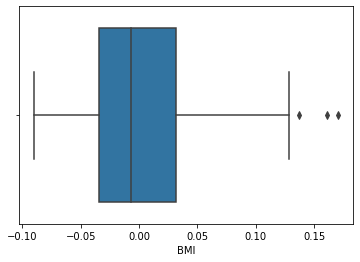

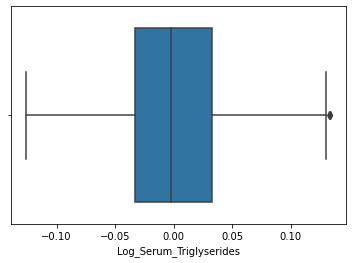

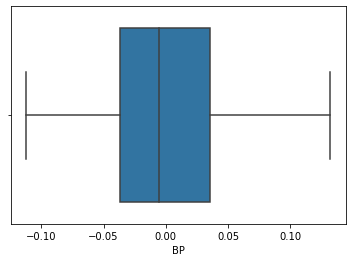

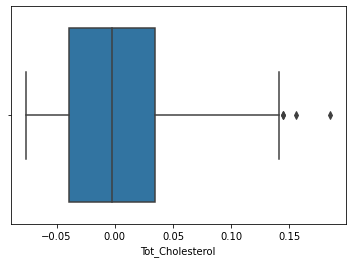

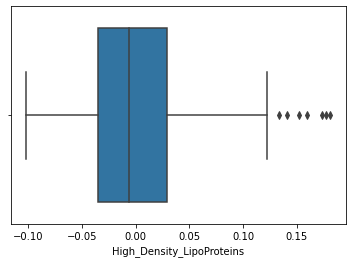

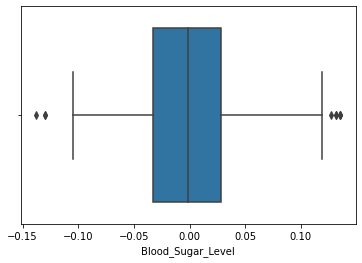

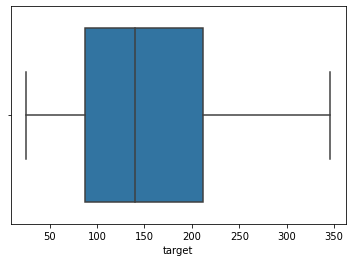

In [66]:
cols=['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','Blood_Sugar_Level','target']
for col in df6.columns:
    sns.boxplot(data=df6,x=col)
    plt.show()

In [67]:
low = .05
high = .95
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df7=df6
df7 = df7[~((df7 < (Q1 - 1.5 * IQR)) |(df7 > (Q3 + 1.5 * IQR))).any(axis=1)]
#df7.dropna(inplace=True)

<ipython-input-67-8d7be484881d>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df7 = df7[~((df7 < (Q1 - 1.5 * IQR)) |(df7 > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-67-8d7be484881d>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df7 = df7[~((df7 < (Q1 - 1.5 * IQR)) |(df7 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [68]:
df7.head()

,BMI,Log_Serum_Triglyserides,BP,Tot_Cholesterol,High_Density_LipoProteins,Blood_Sugar_Level,target
0,0.061696,0.019908,0.021872,-0.002592,-0.043401,-0.017646,151.0
1,-0.051474,-0.068330,-0.026328,-0.039493,0.074412,-0.092204,75.0
2,0.044451,0.002864,-0.005671,-0.002592,-0.032356,-0.025930,141.0
3,-0.011595,0.022692,-0.036656,0.034309,-0.036038,-0.009362,206.0
4,-0.036385,-0.031991,0.021872,-0.002592,0.008142,-0.046641,135.0


<h4><b> Outliers are removed now

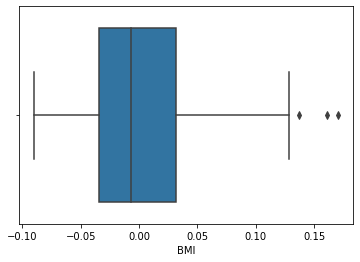

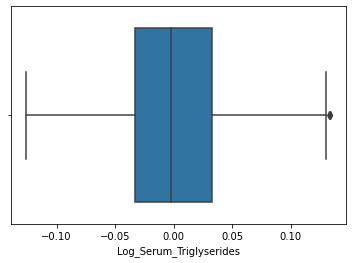

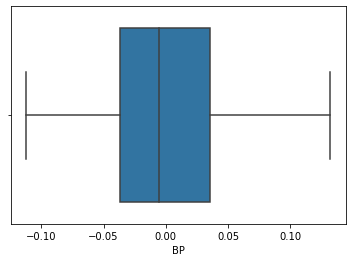

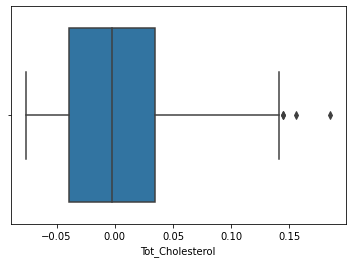

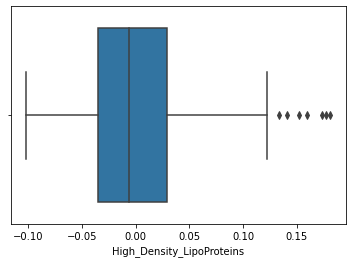

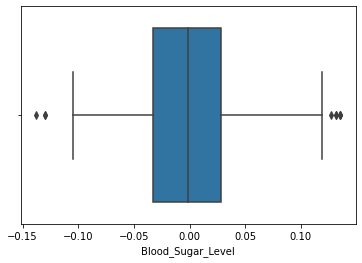

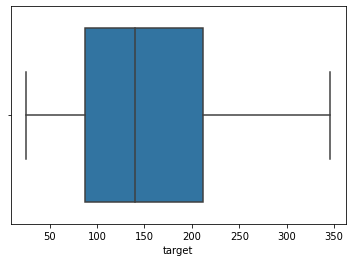

In [69]:
for col in df7.columns:
    sns.boxplot(data=df7,x=col)
    plt.show()

In [70]:
df7.shape

(442, 7)

In [71]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BMI                        442 non-null    float64
 1   Log_Serum_Triglyserides    442 non-null    float64
 2   BP                         442 non-null    float64
 3   Tot_Cholesterol            442 non-null    float64
 4   High_Density_LipoProteins  442 non-null    float64
 5   Blood_Sugar_Level          442 non-null    float64
 6   target                     442 non-null    float64
dtypes: float64(7)
memory usage: 27.6 KB


In [72]:
x7_train,x7_test,y7_train,y7_test=train_test_split(df7.iloc[:,:-1].values,df7.iloc[:,-1:].values,test_size=.1,random_state=6)
x7_train,x7_test,y7_train,y7_test=x7_train,x7_test,y7_train.ravel(),y7_test.ravel()
df7.shape,x7_train.shape, x7_test.shape,y7_train.shape,y7_test.shape

((442, 7), (397, 6), (45, 6), (397,), (45,))

In [73]:
g_desc= SGDRegressor(max_iter=100000,tol=1e-3) 
g_desc.fit(x7_train,y7_train)
y_predict = g_desc.predict(x7_test)
print('rmse & r2 for Corr >.03 & 80/20',rmse1,r21)
print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
g_desc.score(x7_test,y7_test),g_desc.coef_,g_desc.intercept_,g_desc.n_iter_

rmse & r2 for Corr >.03 & 80/20 53.78422809284733 0.5890554510981845
rmse & r2 for Corr >.03 & 90/10 53.79134158273823 0.5889467410427581


(0.5712240155006506,
 array([ 402.16583246,  354.61341741,  283.85650534,   99.8607994 ,
        -167.61141109,  129.7759981 ]),
 array([150.65218854]),
 4519)

In [74]:
#df5=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','target']]
x8_train,x8_test,y8_train,y8_test=train_test_split(df7.iloc[:,:-1].values,df7.iloc[:,-1:].values,test_size=.1,random_state=6)
df7.shape,x8_train.shape, x8_test.shape,y8_train.shape,y8_test.shape

((442, 7), (397, 6), (45, 6), (397, 1), (45, 1))

In [75]:
regr_model.fit(x8_train, y8_train)
y8_predict = regr_model.predict(x8_test)
rmse8 = np.sqrt(mean_squared_error(y8_test, y8_predict))
r28 = r2_score(y8_test, y8_predict)

print('rmse & r2 for Corr >.03 & 80/20',rmse1,r21)
print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
print('rmse & r2 after removing outliers',rmse8,r28)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)
#regr_model.score(x5_test, y5_test)

rmse & r2 for Corr >.03 & 80/20 53.78422809284733 0.5890554510981845
rmse & r2 for Corr >.03 & 90/10 53.79134158273823 0.5889467410427581
rmse & r2 after removing outliers 53.78422809284733 0.5890554510981845
Slope: [[ 517.95124927  537.50018747  295.06581268 -166.76558704 -280.86571673
    44.42022261]]
Intercept: [150.73046389]


<h2><b>The model has 58.9% accuracy

<h4>The Model is not performing better by removing outliers

Therefore best model is as below

In [76]:
regr_model.fit(x5_train, y5_train)
y5_predict = regr_model.predict(x5_test)
rmse5 = np.sqrt(mean_squared_error(y5_test, y5_predict))
r25 = r2_score(y5_test, y5_predict)

print('rmse & r2 for Corr >.03 & 80/20',rmse1,r21)
print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
print('Slope:' ,regr_model.coef_)
print('Intercept:', regr_model.intercept_)
#regr_model.score(x5_test, y5_test)

rmse & r2 for Corr >.03 & 80/20 53.78422809284733 0.5890554510981845
rmse & r2 for Corr >.03 & 90/10 53.79134158273823 0.5889467410427581
Slope: [[ 524.98684474  547.85474602  303.38492681 -158.38908931 -278.57060826]]
Intercept: [150.72236156]
